<a href="https://colab.research.google.com/github/raphamonn/Decision-Tree-with-PokemonData/blob/main/Projeto_Final_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto Final SI**

In [3556]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# BANCOS DE DADOS

Pokémon for Data Mining and Machine Learning
https://www.kaggle.com/datasets/alopez247/pokemon

Pokemon
https://www.kaggle.com/datasets/mlomuscio/pokemon

Aglomerado de links com diferentes datasets sobre pokémons (com descrição): https://swhui.github.io/StatisticsinPokemon/datasets/

Projeto parecido utilizando outro banco de dados:
https://www.kaggle.com/code/mlomuscio/decision-trees-bagging-and-random-forests#Example-3:-Legendary-Pokemon


# LINKS ÚTEIS

* Slides para apresentação do projeto: https://docs.google.com/presentation/d/18WNq6fYuVqZyLmBZHK2iOvpS6AZLH3vcmpDFkA4CDF0/edit?usp=sharing

# DESCRIÇÃO DO BANCO DE DADOS

# TIPO DE MODELO

* Classificação.

# FERRAMENTAS UTILIZADAS PARA O DATASET ESCOLHIDO

* Decision Tree Classifier 
* PCA
* StandardScaler
* Cross-Validation (Cross_Val_score)

# DESCRIÇÃO DO PROBLEMA E IMPLEMENTAÇÃO

* Montar um modelo de Classificação sem que nos dê a predição se um pokemon é lendário ou não com base em suas features, como por exemplo, cor, tamanho, peso, raridade(Catch_rate) entre outras 40+ features, a primeiro momento considerando majoritariamente todas as features, com exceção das que foram removidas durante o pré processamento por possuírem ou muitos dados NULL.

* Exibir uma matriz de correlação entre os dados que extraia quais quais são as melhores variáveis pra levar em consideração na hora de classificar se um pokémon é ou não lendário, para posterior comparação com quais features o modelo escolheu.

* Avaliar a eficácia do modelo conforme acurácia e outras pontuações, além de verificar quais foram as features mais importantes para a formação da árvore além de exibí-la e verificar quais foram os erros individuais do algoritmo.

* Comparar as pontuações do primeiro algoritmo sem PCA com um novo desta vez fazendo o uso da ferramenta para que possamos avaliar a viabilidade ou não da redução da dimensionalidade dos dados.

* Exibir visualmente em 2D os dados de treino através do PCA a fim de entender quão possível seria separar os dados através de apenas duas features/dimensões 

# SUGESTÃO DE ROTEIRO DE IMPLEMENTAÇÃO

1. Tratamento/Pré-processamento do banco de dados. ***OK***

2. Correlação entre as variáveis de um pokémon e o fato de ele ser lendário ou não. Matriz de correlação. ***OK***

3. Redução de dimensionalidade, se for cabível. (Acho legal utilizar tudo) ***OK***

4. Novo tratamento de dados removendo dados redundantes (variáveis que não contribuem em nada com o fato de ser lendário ou não), se for cabível.  ***OK***

5. Separação dos dados em treino e teste. ***OK***

6. Escolher e criar um classificador. ***OK***

7. Pode-se escolher mais de um classificador e, depois, compará-los (mais conteúdo pra uma eventual apresentação -- comparar classificadores, como sugerido pelo professor). 

8. Análise de desempenho do classificador por meio das métricas de classificação (Accuracy, Confusion Matrix, F1 Score, F-beta Score, Precision, Recall, ROC etc.)  ***OK***

9. Escolha de algum método de validação (Holdout, k-Fold, Bootstrap)**OK***

10. Treino. ***OK***

11. (...) 

12. Teste. ***OK***
 
13. Gráficos, análises de resultados, etc... ***OK***



# PRÉ-PROCESSAMENTO DE DADOS
 * {descrição do que precisamos modificar da tabela original e, em seguida, o código para esta modificação -- caso tenha sido feito em python, claro}.

In [3557]:
!pip install graphviz # Visualizar o Grafo da Decision Tree

# Talvez seja necessário utilizar no CMD do Windows
!conda install python-graphviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found


In [3558]:
#Pré-processamento de dados.
import pandas as pd
import numpy as np

#Exibição dos dados.
import seaborn as sns
import matplotlib.pyplot as plt

#Medição de tempo
import time 

# Módulos do SKlearn 
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

%matplotlib inline

#Leitura do csv com os pokemon.
pokemon = pd.read_csv('/content/drive/MyDrive/pokemon_alopez247.csv')

In [3559]:
print(pokemon.shape)
pokemon.head()

(721, 23)


,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3560]:
#Análise de quais dados são NULL.
pokemon.isnull().sum()

Number                0
Name                  0
Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

Lidando com dados Null

In [3561]:
#preenchendo os campos nulos de Pr_Male com 0,5 para pokemons que possuem a Feature "hasGender" = False 
pokemon['Pr_Male'] = pokemon['Pr_Male'].fillna(0.5) 
pokemon= pokemon.drop(['Egg_Group_2', 'Type_2'], axis=1)

pokemon.isnull().sum()

Number              0
Name                0
Type_1              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
Color               0
hasGender           0
Pr_Male             0
Egg_Group_1         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Catch_Rate          0
Body_Style          0
dtype: int64

Sem dados NULL podemos prosseguir com o pré-processamento

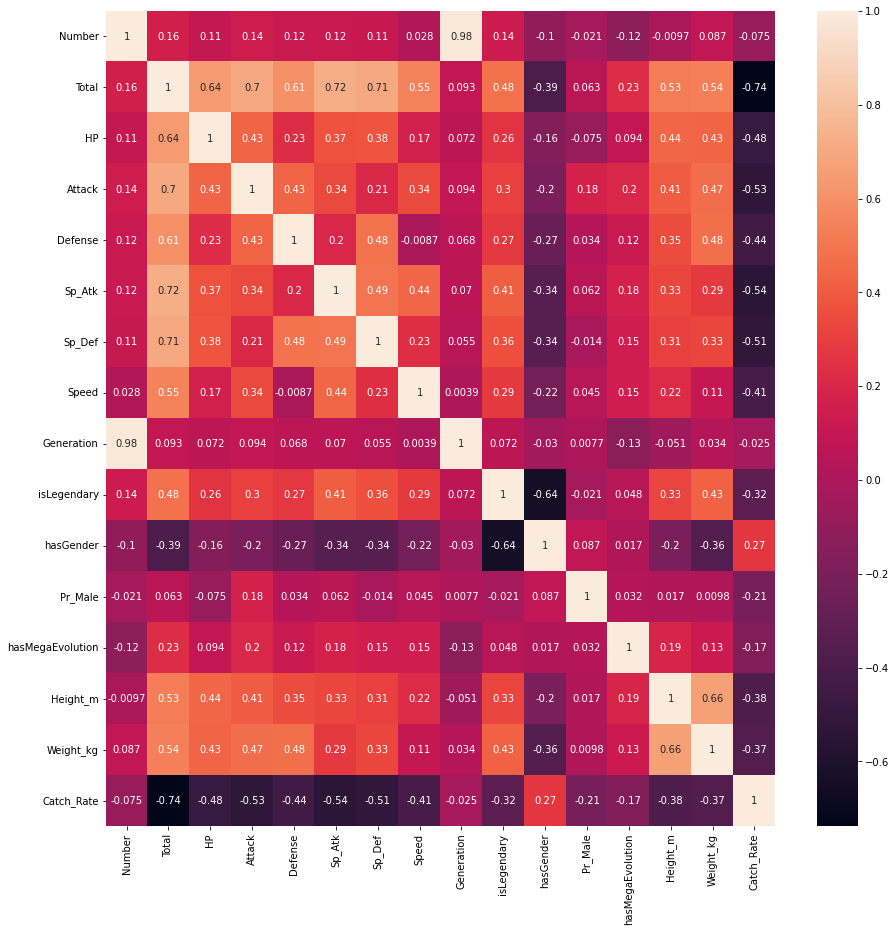

In [3562]:
# Imprimindo a matriz que mostra a correlação entre os dados
plt.figure(figsize=(15,15))
dataplot=sns.heatmap(pokemon.corr(), annot=True)

Imprimindo a matriz de correlação entre os dados numéricos e booleanos do dataset, foi possível extrair algumas informações interessantes, que têm um sentido intuitivo. Por exemplo, há uma enorme correlação entre o número do Pokémon e sua geração, o que é esperado, já que a cada geração são lançados x Pokemón; outro dado interessante, é que há uma correlação negativa, porém considerável entre os atributos "isLegendary" e "Catch_Rate", o que é coerente, já que Pokemón lendários são raros.

---



In [3563]:
#Extraindo somente os dados de correlação relacionados à ser ou não lendário
corr= pokemon.corr()
corr=(corr[['isLegendary']]).abs()
corr.head()

,isLegendary
Number,0.135022
Total,0.481837
HP,0.258926
Attack,0.302786
Defense,0.274446


A tabela acima apresenta as features correlacionadas com a feature isLegendary, de forma que seria possível realizar a exclusão de features menos relevantes. Optou-se por mantê-las para avaliação dos resultados.

In [3564]:
print(pokemon.shape)
pokemon.info()

(721, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Total             721 non-null    int64  
 4   HP                721 non-null    int64  
 5   Attack            721 non-null    int64  
 6   Defense           721 non-null    int64  
 7   Sp_Atk            721 non-null    int64  
 8   Sp_Def            721 non-null    int64  
 9   Speed             721 non-null    int64  
 10  Generation        721 non-null    int64  
 11  isLegendary       721 non-null    bool   
 12  Color             721 non-null    object 
 13  hasGender         721 non-null    bool   
 14  Pr_Male           721 non-null    float64
 15  Egg_Group_1       721 non-null    object 
 16  hasMegaEvolution  721 non-null    

Após lidar com os dados null, é necessário transformar os dados categóricos restantes, representados como "object", em dados que possam ser lidos pelo algoritmo. Sendo assim, estes serão transformados ou em booleanos ou entradas numéricas. Os dados que possuem essa categoria são: **Type_1, Name, Egg_Group, Body_Style e Color**, conforme explicitado na tabela acima. Iniciando por **Type_1**:

In [3565]:
#Contagem de quantas entradas tem em cada tipo de pokémon.
print("Antes da mescla")
print("____________")
display((pokemon['Type_1'].value_counts()))

#Conversão para reduzir os tipos de pokémon tratados.
pokemon = pokemon.replace(['Water','Ice'], 'Water')
pokemon = pokemon.replace(['Grass','Bug','Poison'], 'Grass')
pokemon = pokemon.replace(['Psychic','Dark','Ghost'], 'Dark')
pokemon = pokemon.replace(['Electric','Steel'], 'Electric')
pokemon = pokemon.replace(['Rock','Ground'], 'Rock')

print("____________")
print("Após a mescla")
display((pokemon['Type_1'].value_counts()))


Antes da mescla
____________


Water       105
Normal       93
Grass        66
Bug          63
Fire         47
Psychic      47
Rock         41
Electric     36
Ground       30
Poison       28
Dark         28
Fighting     25
Dragon       24
Ghost        23
Ice          23
Steel        22
Fairy        17
Flying        3
Name: Type_1, dtype: int64

____________
Após a mescla


Grass       157
Water       128
Dark         98
Normal       93
Rock         71
Electric     58
Fire         47
Fighting     25
Dragon       24
Fairy        17
Flying        3
Name: Type_1, dtype: int64

Feito isso, cada tipo será transformado em uma nova feature, ou seja, a feature que era categórica agora será dividida em onze novas features, assim, pode-se remover a antiga coluna **Type_1**.

In [3566]:
#Gerando um novo dataframe com cada feature sendo um dos onze tipos.
Poke_Type = pd.get_dummies(pokemon['Type_1'])

#Novo dataframe com as novas features.
Poke = pd.concat([pokemon,Poke_Type], axis=1)

#Removendo a antiga feature (que informava o tipo do pokémon).
Poke = Poke.drop(['Type_1'], axis=1)

#Visualizando shape.
print(Poke_Type.shape)
print(Poke.shape)

#Visualizando os dados.
Poke.head()

(721, 11)
(721, 31)


,Number,Name,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Dragon,Electric,Fairy,Fighting,Fire,Flying,Grass,Normal,Rock,Water
0,1,Bulbasaur,318,45,49,49,65,65,45,1,...,0,0,0,0,0,0,1,0,0,0
1,2,Ivysaur,405,60,62,63,80,80,60,1,...,0,0,0,0,0,0,1,0,0,0
2,3,Venusaur,525,80,82,83,100,100,80,1,...,0,0,0,0,0,0,1,0,0,0
3,4,Charmander,309,39,52,43,60,50,65,1,...,0,0,0,0,1,0,0,0,0,0
4,5,Charmeleon,405,58,64,58,80,65,80,1,...,0,0,0,0,1,0,0,0,0,0


A feature **Names** será removida dado que o algoritmo lida com dados numéricos, porém preservada para que possamos utiizá-la posteriormente para identificar os Pokemon que foram classificados incorretamente no final do algoritmo

In [3567]:
Poke_names = Poke[['Name']].copy()
Poke = Poke.drop(['Name'], axis=1)
print(Poke.shape)
Poke_names.head()

(721, 30)


,Name
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon


Feito isso, o processo será repetido para a feature **Egg_Group_1**.

In [3568]:
#Contagem de quantas entradas tem em cada tipo de ovo de pokémon.
print("____________")
display((Poke['Egg_Group_1'].value_counts()))

____________


Field           169
Grass            93
Monster          74
Water_1          74
Undiscovered     73
Mineral          46
Flying           44
Amorphous        41
Human-Like       37
Fairy            30
Water_2          15
Water_3          14
Dragon           10
Ditto             1
Name: Egg_Group_1, dtype: int64

In [3569]:
#Anexando os tipo Water_1 ... Water_3 em apenas Water.
Poke = Poke.replace(['Water_1','Water_2','Water_3'], 'Egg_water')

print("____________")
display((Poke['Egg_Group_1'].value_counts()))

____________


Field           169
Egg_water       103
Grass            93
Monster          74
Undiscovered     73
Mineral          46
Flying           44
Amorphous        41
Human-Like       37
Fairy            30
Dragon           10
Ditto             1
Name: Egg_Group_1, dtype: int64

In [3570]:
#Gerando um novo dataframe com cada feature sendo um dos tipos de ovos.
Poke_Egg = pd.get_dummies(Poke['Egg_Group_1'])

#Mudando os nomes para que não haja confusão com os tipos de *Pokemon*
Poke_Egg = Poke_Egg.rename(columns={'Field':'Egg_Field','Grass':'Egg_Grass','Monster':'Egg_Monster','Undiscovered':'Egg_Undiscovered',
                'Mineral':'Egg_Mineral','Flying':'Egg_Flying','Amorphous':'Egg_Amorphous','Human-Like':'Egg_Human-Like',
                'Fairy':'Egg_Fairy','Dragon':'Egg_Dragon','Ditto':'Egg_Ditto'})

#Anexando o novo dataframe ao dataframe atual.
Poke = pd.concat([Poke,Poke_Egg], axis=1)

#Removendo a antiga feature que informava o Egg_Group.
Poke = Poke.drop(['Egg_Group_1'], axis=1)

#Verificando o novo shape.
print(Poke.shape)

(721, 41)


A feature **Color** passará pelo mesmo processo.

In [3571]:
#Contagem de quantas cores o Dataset Possui
print("____________")
display((Poke['Color'].value_counts()))

____________


Blue      134
Brown     110
Green      79
Red        75
Grey       69
Purple     65
Yellow     64
White      52
Pink       41
Black      32
Name: Color, dtype: int64

In [3572]:
#Gerando um novo dataframe com cada feature sendo uma das cores.
Poke_Color = pd.get_dummies(Poke['Color'])

#Anexando o novo dataframe ao dataframe atual.
Poke = pd.concat([Poke,Poke_Color], axis=1)

#Removendo a antiga feature que informava o Color.
Poke = Poke.drop(['Color'], axis=1)

#Verificando o novo shape .
print(Poke.shape)

#Verificando a "cara" dos dados.
Poke.head()

(721, 50)


,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,1,318,45,49,49,65,65,45,1,False,...,0,0,0,1,0,0,0,0,0,0
1,2,405,60,62,63,80,80,60,1,False,...,0,0,0,1,0,0,0,0,0,0
2,3,525,80,82,83,100,100,80,1,False,...,0,0,0,1,0,0,0,0,0,0
3,4,309,39,52,43,60,50,65,1,False,...,0,0,0,0,0,0,0,1,0,0
4,5,405,58,64,58,80,65,80,1,False,...,0,0,0,0,0,0,0,1,0,0


Por fim, o **Body_Style**.

In [3573]:
#Contagem de quantas entradas tem em cada Body_Style.
print("____________")
display((Poke['Body_Style'].value_counts()))

#Mesclando tipos de corpos parecidos.
Poke = Poke.replace(['bipedal_tailed','bipedal_tailless'], 'bipedal')
Poke = Poke.replace(['head_arms','head_only','head_base','head_legs'], 'head')
Poke = Poke.replace(['two_wings','four_wings'], 'hasWings')



____________


bipedal_tailed      158
quadruped           135
bipedal_tailless    109
two_wings            63
head_arms            39
head_only            34
with_fins            31
insectoid            30
head_base            30
serpentine_body      29
four_wings           18
head_legs            17
multiple_bodies      15
several_limbs        13
Name: Body_Style, dtype: int64

In [3574]:
#Gerando um novo dataframe com cada feature sendo um dos tipos corporais.
Poke_Body = pd.get_dummies(Poke['Body_Style'])

#Anexando o novo dataframe ao dataframe atual.
Poke = pd.concat([Poke,Poke_Body], axis=1)

#Removendo a antiga feature que informava o Egg_Group.
Poke = Poke.drop(['Body_Style'], axis=1)

#Verificando o novo shape.
print(Poke.shape)

#Verificando a "cara" dos dados.
Poke.head()

(721, 58)


,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,...,Yellow,bipedal,hasWings,head,insectoid,multiple_bodies,quadruped,serpentine_body,several_limbs,with_fins
0,1,318,45,49,49,65,65,45,1,False,...,0,0,0,0,0,0,1,0,0,0
1,2,405,60,62,63,80,80,60,1,False,...,0,0,0,0,0,0,1,0,0,0
2,3,525,80,82,83,100,100,80,1,False,...,0,0,0,0,0,0,1,0,0,0
3,4,309,39,52,43,60,50,65,1,False,...,0,1,0,0,0,0,0,0,0,0
4,5,405,58,64,58,80,65,80,1,False,...,0,1,0,0,0,0,0,0,0,0


Após este processamento, agora é possível trabalhar com os dados formados, uma vez que todos são de tipos numéricos ou booleanos, como pode ser verificado na célula abaixo.

In [3575]:
Poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Total             721 non-null    int64  
 2   HP                721 non-null    int64  
 3   Attack            721 non-null    int64  
 4   Defense           721 non-null    int64  
 5   Sp_Atk            721 non-null    int64  
 6   Sp_Def            721 non-null    int64  
 7   Speed             721 non-null    int64  
 8   Generation        721 non-null    int64  
 9   isLegendary       721 non-null    bool   
 10  hasGender         721 non-null    bool   
 11  Pr_Male           721 non-null    float64
 12  hasMegaEvolution  721 non-null    bool   
 13  Height_m          721 non-null    float64
 14  Weight_kg         721 non-null    float64
 15  Catch_Rate        721 non-null    int64  
 16  Dark              721 non-null    uint8  
 1

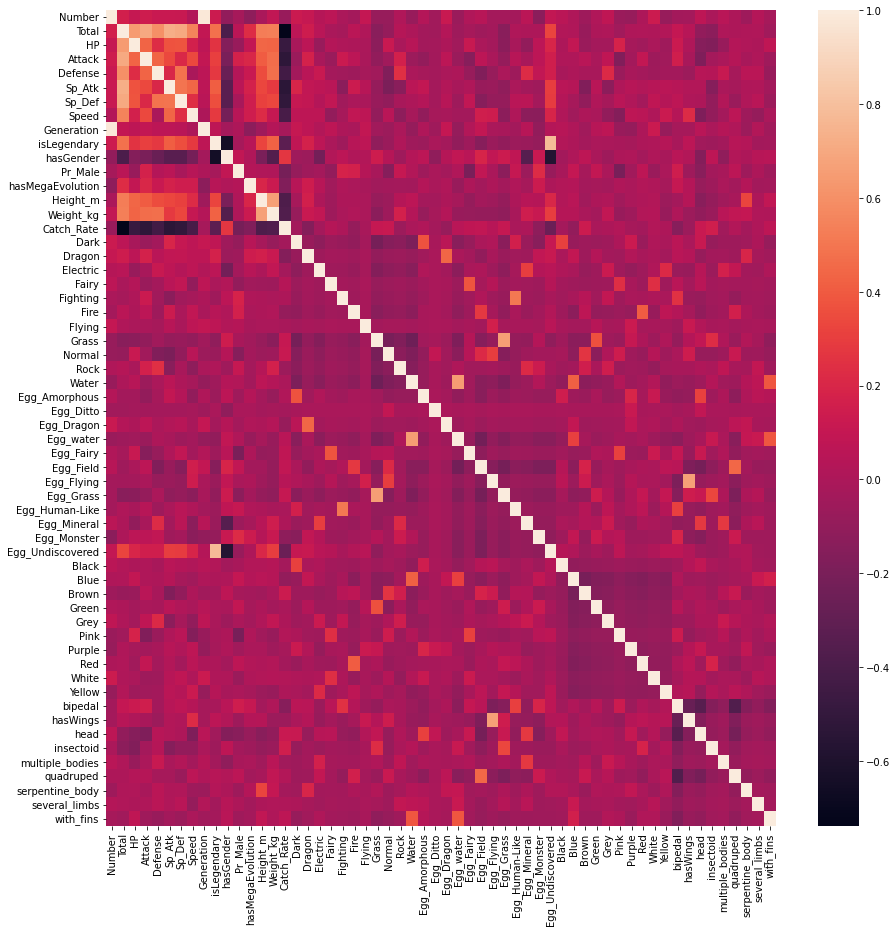

In [3576]:
# Imprimindo a matriz que mostra a correlação entre os dados
plt.figure(figsize=(15,15))
dataplot=sns.heatmap(Poke.corr())

Neste ponto, já não é mais possível identificar com clareza quais são os dados mais correlacionados apenas com a imagem. Então será realizado o mesmo procedimento de extrair somente as features correlacionadas com a feature isLegendary.

In [3577]:
corrfinal= Poke.corr()
corrfinal=(corrfinal[['isLegendary']]).abs().sort_values(by="isLegendary", ascending=False)
corrfinal.head()

,isLegendary
isLegendary,1.000000
Egg_Undiscovered,0.777773
hasGender,0.644714
Total,0.481837
Weight_kg,0.425219


A partir da informação acima, foi possível descobrir uma feature feature ainda mais importante que "hasGender", "{nome da feature}", o que é esperado, pois não é possível chocar ovos de lendários, com apenas duas exceções. 
___

separando o "target" das outros features

In [3578]:
target = Poke['isLegendary'].copy()

# removendo o Target dos dados 
data = Poke.drop(['isLegendary'], axis=1)

target.head()

0    False
1    False
2    False
3    False
4    False
Name: isLegendary, dtype: bool

# CLASSIFICAÇÃO SEM PCA

In [3579]:
# Dividindo os dados de treino e teste
Xtrain, Xtest, ytrain, ytest = tts(data, target , test_size=0.35, shuffle=True)

In [3580]:
#Verificando shapes
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(468, 57)
(468,)
(253, 57)
(253,)


In [3581]:
#Treinando o modelo
model = dt()
              
model.fit(Xtrain,ytrain)

#Testando o modelo com o conjunto de teste
y_pred = model.predict(Xtest)

aplicando o Cross Validation para estimar a acurácia e precisão do modelo


#MÉTRICAS DE AVALIAÇÃO SEM PCA

In [3582]:
#Extraindo a Precisão média a partir de validação cruzada
scores_prc = cross_val_score(model,data,target, cv=5, scoring='precision')
#Extraindo a Acurácia média a partir de validação cruzada
scores_acc = cross_val_score(model,data,target, cv=5, scoring='accuracy')

In [3583]:
print("Precisões medidas:", scores_prc)
print("Acurácias medidas:", scores_acc)

Precisões medidas: [1.         0.8        0.72727273 0.8        0.63636364]
Acurácias medidas: [0.99310345 0.97916667 0.97916667 0.97916667 0.97916667]


In [3584]:
scores_acc = scores_acc.mean()
scores_prc = scores_prc.mean()

print('Precisão média: {:2.2%}'.format(scores_prc ))
print('Acurácia média: {:2.2%}'.format(scores_acc ))

Precisão média: 79.27%
Acurácia média: 98.20%


Score do modelo: 98.42%


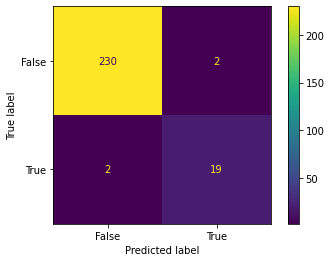

In [3585]:
#Visualização da matriz de confusão
ConfusionMatrixDisplay.from_estimator(model, Xtest,ytest)

# Dados explicados
print('Score do modelo: {:2.2%}'.format(model.score(Xtest,ytest)))

In [3586]:
#Métricas em geral
print(classification_report(ytest, y_pred, target_names=['Not_Legendary','Legendary']))

               precision    recall  f1-score   support

Not_Legendary       0.99      0.99      0.99       232
    Legendary       0.90      0.90      0.90        21

     accuracy                           0.98       253
    macro avg       0.95      0.95      0.95       253
 weighted avg       0.98      0.98      0.98       253



<Figure size 2160x2160 with 0 Axes>

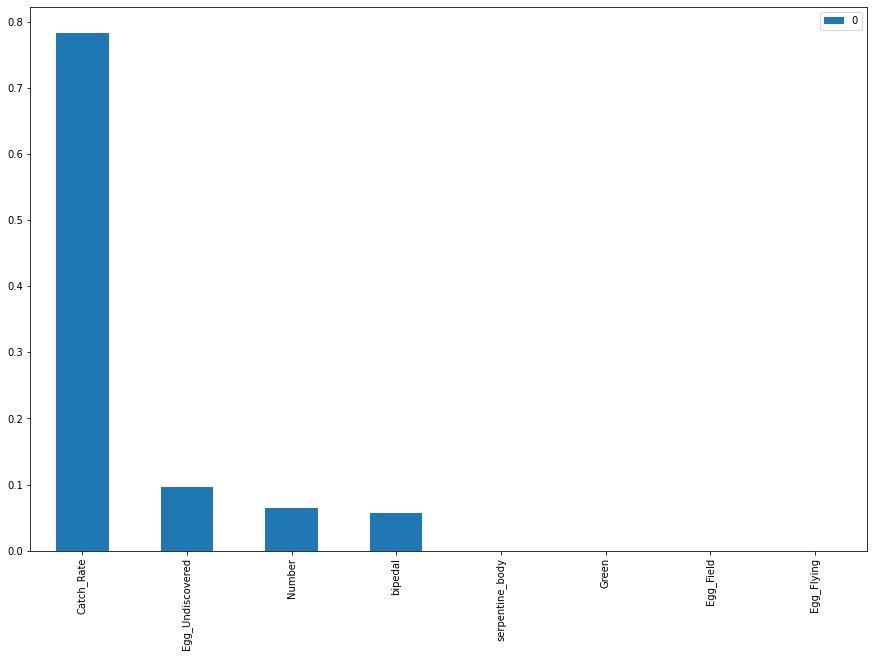

In [3587]:
#Extraindo a importancia relativa das features
model.feature_importances_
feature_importance= pd.DataFrame(model.feature_importances_, index = data.columns).sort_values(by=0, ascending=False)

features= list(feature_importance[feature_importance[0]>0].index)
plt.figure(figsize=(30,30))
feature_importance.head(8).plot(figsize=(15,10),kind='bar')
plt.show()

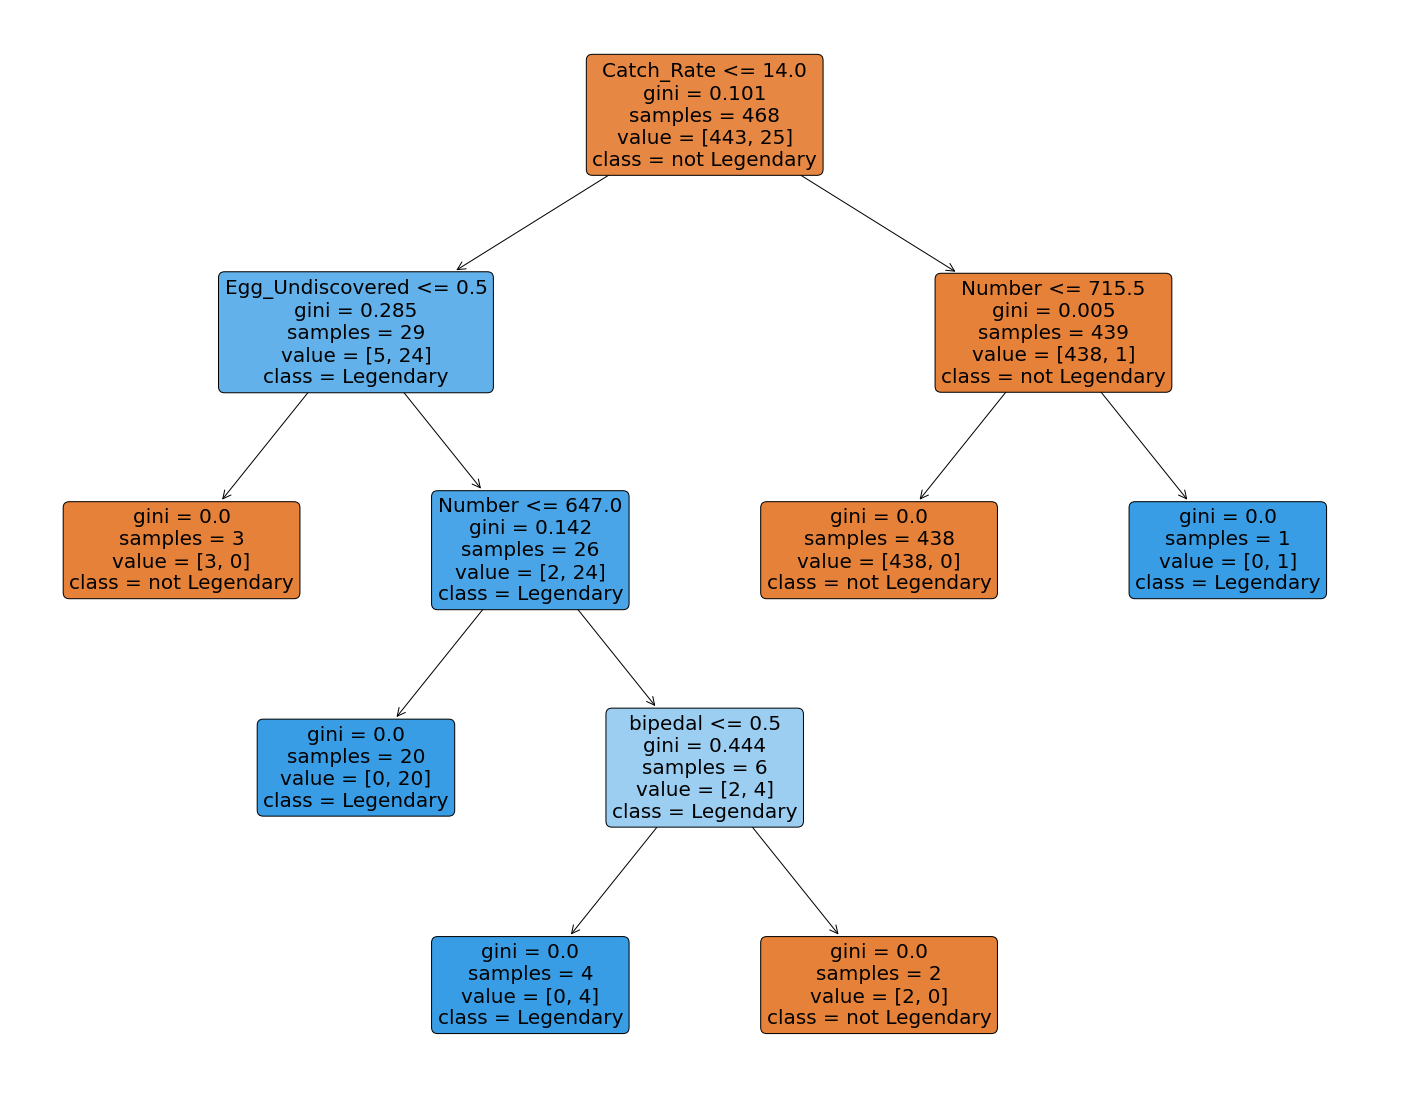

In [3588]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=data.columns,
                   class_names = {0: 'not Legendary', 1:'Legendary'},
                   filled=True,
                   fontsize=20,
                   rounded=True
                   )

#EXIBIÇÃO DOS ERROS INDIVIDUAIS DO CLASSIFICADOR SEM PCA

Transformando a saída predita e esperada em um único dataframe que possua apenas o 

In [3589]:
y_df = pd.DataFrame(data = y_pred, columns = ['isLegendary'], index = Xtest.index.copy())

df_out = pd.merge(Poke, y_df, how = 'left', left_index = True, right_index = True)

df_out = pd.merge(Poke_names, df_out, how = 'left', left_index = True, right_index = True)

df_out = df_out.dropna(axis=0)
df_out = df_out.where (df_out['isLegendary_x'] != df_out['isLegendary_y']).dropna(axis=0)
df_out['Number'] = df_out['Number'].astype(int)

Exibe apenas os pokemons cuja saída predita foi diferente da esperada, ou seja, os erros individuais do Classificador

In [3590]:
#Tornando os dados mais intuitivos para entendimento

df_out = df_out.rename(columns={'isLegendary_x': 'Saída_Esperada', 'isLegendary_y': 'Saída_Predita', 'Number': 'Numero'})
display(df_out[["Name","Saída_Esperada","Saída_Predita","Numero"]])


,Name,Saída_Esperada,Saída_Predita,Numero
383,Rayquaza,True,False,384
487,Cresselia,False,True,488
491,Shaymin,True,False,492
646,Keldeo,False,True,647


# CLASSIFICAÇÃO COM PCA



Verificando o desbalanceio de dados, que é esperado já que os pokemons lendários são Raros

In [3600]:
print(data.shape)
print(target.shape)

#Criados para que não haja confusão no código acima
data1 = data
target1 = target

print("Análise da distribuição das classes")

np.unique(target1,return_counts=True)

(721, 57)
(721,)
Análise da distribuição das classes


(array([False,  True]), array([675,  46]))

Para que possamos utilizar o PCA, é necessário que tenhamos os dados numa mesma escala, por isso iremos tratar os dados utilizando a ferramenta StandardScaler, uma etapa que normalmente estaria associada ao pré processamento

aplicando o PCA e StandardScaler

In [3601]:
#Utilizando o StandardScaler para fazer com que os dados numéricos fiquem na mesma escala
scale_obj = StandardScaler()
data1 = scale_obj.fit_transform(data1.astype(float))

#Separando os dados com 35% sendo para teste
Xtrain, Xtest, ytrain, ytest = tts(data1,target1, test_size= 0.35, shuffle=True)

#Aplicando o PCA para 10 componentes
from sklearn import decomposition  
pca = decomposition.PCA(n_components=10)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest) 

Treinando o modelo 

In [3602]:
#Treinando o modelo
model1 = dt()  

#treinando o modelo
model1.fit(Xtrain,ytrain)

#Testando o modelo com o conjunto de teste
y_pred1 = model1.predict(Xtest)

#MÉTRICAS DE AVALIAÇÃO COM PCA

In [3603]:
#Extraindo a Precisão média a partir de validação cruzada
scores_prc = cross_val_score(model1,data1,target1, cv=5, scoring='precision')
#Extraindo a Acurácia média a partir de validação cruzada
scores_acc = cross_val_score(model1,data1,target1, cv=5, scoring='accuracy')

In [3604]:
print("Precisões medidas:", scores_prc)
print("Acurácias medidas:", scores_acc)

Precisões medidas: [1.         0.8        0.8        0.88888889 0.69230769]
Acurácias medidas: [1.         0.97916667 0.97916667 0.98611111 0.95138889]


In [3605]:
scores_acc = scores_acc.mean()
scores_prc = scores_prc.mean()

print('Precisão média: {:2.2%}'.format(scores_prc ))
print('Acurácia média: {:2.2%}'.format(scores_acc ))

Precisão média: 83.62%
Acurácia média: 97.92%


Score do modelo: 98.42%


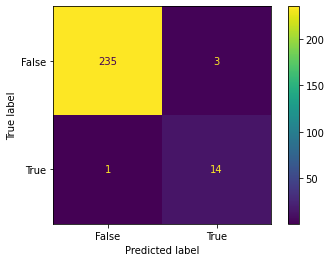

In [3606]:
#Visualização da matriz de confusão
ConfusionMatrixDisplay.from_estimator(model1, Xtest,ytest)

# Dados explicados
print('Score do modelo: {:2.2%}'.format(model1.score(Xtest,ytest)))

In [3607]:
#Métricas em geral
print(classification_report(ytest, y_pred, target_names=['Not_Legendary','Legendary']))

               precision    recall  f1-score   support

Not_Legendary       0.94      0.92      0.93       238
    Legendary       0.10      0.13      0.11        15

     accuracy                           0.87       253
    macro avg       0.52      0.53      0.52       253
 weighted avg       0.89      0.87      0.88       253



#Visualização PCA

Com o PCA podemos adquirir uma métrica de quão bem os dados são explicados nas novas dimensões, nesse caso utilizaremos 2 para que possamos visualizar como ficaria a separação graficamente 

In [3608]:
from sklearn.decomposition import PCA
pca_viewer = PCA(n_components=2)
principal_components = pca_viewer.fit_transform(Xtrain)

#Calculo de quanto o PCA explica dos dados pré redução
print("Porcentagem de variancia explicada por cada componente")
print(pca_viewer.explained_variance_ratio_)

data_explained = sum(pca_viewer.explained_variance_ratio_)
print('Dados explicados pelo PCA: {:2.2%}'.format(data_explained))

Porcentagem de variancia explicada por cada componente
[0.21032555 0.11142905]
Dados explicados pelo PCA: 32.18%


Transformando as componentes principais do PCA de duas dimensões em um dataframe para que possamos plotar em um gráfico 2D para visualizar como é a separação dos dados em 2D

In [3609]:
principal_components_df = pd.DataFrame(data = principal_components, 
                                       columns = ['principal component 1', 'principal component 2'])
principal_components_df.head()

,principal component 1,principal component 2
0,0.964886,-0.444094
1,0.611779,1.101085
2,1.325668,-0.312492
3,3.765051,-1.133618
4,-3.188782,0.756514


In [3610]:
#Troca de nomes para tornar o entendimento do gráfico abaixo mais intuitivo 
ytrain.astype(int)
ytrain = np.where (ytrain == True, 'Legendary', ytrain)
ytrain = np.where(ytrain == 'False', 'not_Legendary', ytrain)


Plot do gráfico de PCA com duas dimensões

<Figure size 432x288 with 0 Axes>

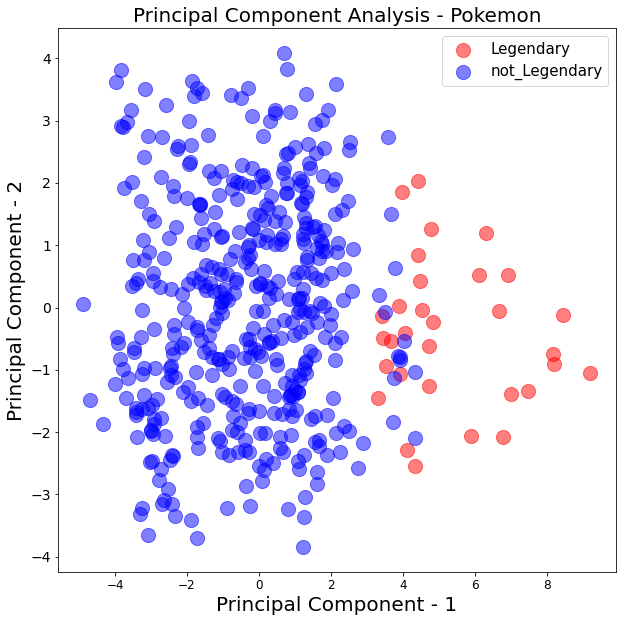

In [3611]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)

plt.title("Principal Component Analysis - Pokemon",fontsize=20)
targets = ['Legendary', 'not_Legendary']
colors = ['r', 'b']

for target1, color in zip(targets,colors):
    indicesToKeep = ytrain == target1
    plt.scatter(principal_components_df.loc[indicesToKeep, 'principal component 1'], 
                principal_components_df.loc[indicesToKeep, 'principal component 2'], 
                c = color, s = 200, alpha=0.5)

plt.legend(targets,prop={'size': 15})
plt.show()

Como podemos ver acima, os dados têm uma certa separação visível, porém é esperado que hajam confusões por parte do algoritmo ao classificar utilizando apenas duas dimensões, já que em algumas áreas os dados se misturam

#***EXTRA***

# TESTE COMPARATIVO COM KNN

In [3652]:
data2 = data
target2 = target

In [3653]:
#Utilizando o StandardScaler para fazer com que os dados numéricos fiquem na mesma escala
"""scale_obj = StandardScaler()
data1 = scale_obj.fit_transform(data1.astype(float))"""

#Separando os dados com 35% sendo para teste
Xtrain, Xtest, ytrain, ytest = tts(data2,target2, test_size= 0.35, shuffle=True)

#Aplicando o PCA para 10 componentes
"""from sklearn import decomposition  
pca = decomposition.PCA(n_components=10)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest) """

'from sklearn import decomposition  \npca = decomposition.PCA(n_components=10)\nXtrain = pca.fit_transform(Xtrain)\nXtest = pca.transform(Xtest) '

Treinando o modelo 

In [3654]:
from sklearn.neighbors import KNeighborsClassifier as KNN

#Treinando o modelo
model2 = KNN(n_neighbors=1)  

In [3655]:
model2.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [3656]:
#treinando o modelo


#Testando o modelo com o conjunto de teste
y_pred1 = model2.predict(Xtest)

In [3658]:
model2.score(Xtest,ytest)

0.9723320158102767